## Experiments

### Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk, load_MLCup
from src.model import MLP
from src.Optimizers import HBG, CG
from src.GridSearch import GridSearch
from src.EarlyStopping import EarlyStopping

In [2]:
path = os.getcwd()
file_train = '/data/ML-CUP22-TR.csv'
file_test = '/data/ML-CUP22-TS.csv'

labels_train = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']
labels_test = ['x1','x2','x3','x4','x5','x6','x7','x8','x9']

X_train, y_train = load_MLCup(path + file_train, labels_train)
X_test = load_MLCup(path + file_test, labels_test)

### Experiment 1. Convex optimization. (Linear NN).

#### Grid Search
Nel CG, sceglie sempre m2 minore possibile (ma vuol dire anche che va più lento... che vogliamo fare?) \
forse il modo di fare la grid search è mettere le max epochs come stopping condition così in qualche modo consideriamo anche la velocità

In [3]:
params_grid = {
    'alpha' : [0.0005, 0.001, 0.005, 0.01],
    'beta' : [0.7, 0.8, 0.9],
    'stopping_value' : [1e-4]
}

model = MLP([20], 9, 2, task = "regression", activation_function = 'id')
optimizer = HBG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)

Grid search of 12 combinations.


100%|██████████| 12/12 [00:00<00:00, 101.59it/s]




Parameters of best model, evaluated on training_objective: {'alpha': 0.01, 'beta': 0.8, 'stopping_value': 0.0001} 
Best training_objective: 3.00497584460371


In [14]:
params_grid = {
    'm2' : [0.2, 0.3, 0.4],
    'm1' : [0.1],
    'stopping_value' : [1e-4],
    'beta_type' : ['FR']
}

model = MLP([20], 9, 2, task = "regression", activation_function = 'id')
optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)
grid.results

Grid search of 3 combinations.


100%|██████████| 3/3 [00:00<00:00, 3014.59it/s]




Parameters of best model, evaluated on training_objective: {'m2': 0.2, 'm1': 0.1, 'stopping_value': 0.0001, 'beta_type': 'FR'} 
Best training_objective: 3.0204002594068124


[(3.0204002594068124,
  {'m2': 0.2, 'm1': 0.1, 'stopping_value': 0.0001, 'beta_type': 'FR'},
  [3.0204002594068124]),
 (3.020591344491218,
  {'m2': 0.3, 'm1': 0.1, 'stopping_value': 0.0001, 'beta_type': 'FR'},
  [3.020591344491218]),
 (3.0238889214013436,
  {'m2': 0.4, 'm1': 0.1, 'stopping_value': 0.0001, 'beta_type': 'FR'},
  [3.0238889214013436])]

In [9]:
params_grid = {
    'm2' : [0.1, 0.2, 0.3, 0.4],
    'm1' : [0.05],
    'stopping_value' : [1e-4],
    'beta_type' : ['HS+']
}

model = MLP([20], 9, 2, task = "regression", activation_function = 'id')
optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)
grid.results

Grid search of 4 combinations.


100%|██████████| 4/4 [00:00<00:00, 2609.62it/s]




Parameters of best model, evaluated on training_objective: {'m2': 0.1, 'm1': 0.05, 'stopping_value': 0.0001, 'beta_type': 'HS+'} 
Best training_objective: 3.019217026702769


[(3.019217026702769,
  {'m2': 0.1, 'm1': 0.05, 'stopping_value': 0.0001, 'beta_type': 'HS+'},
  [3.019217026702769]),
 (3.019715570367304,
  {'m2': 0.2, 'm1': 0.05, 'stopping_value': 0.0001, 'beta_type': 'HS+'},
  [3.019715570367304]),
 (3.0220807501190334,
  {'m2': 0.3, 'm1': 0.05, 'stopping_value': 0.0001, 'beta_type': 'HS+'},
  [3.0220807501190334]),
 (3.028330990903443,
  {'m2': 0.4, 'm1': 0.05, 'stopping_value': 0.0001, 'beta_type': 'HS+'},
  [3.028330990903443])]

In [11]:
params_grid = {
    'm2' : [0.1, 0.2, 0.3, 0.4],
    'm1' : [0.05],
    'stopping_value' : [1e-4],
    'beta_type' : ['PR+']
}

model = MLP([20], 9, 2, task = "regression", activation_function = 'id')
optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)
grid.results

Grid search of 4 combinations.


100%|██████████| 4/4 [00:00<00:00, 9974.56it/s]




Parameters of best model, evaluated on training_objective: {'m2': 0.1, 'm1': 0.05, 'stopping_value': 0.0001, 'beta_type': 'PR+'} 
Best training_objective: 3.0171278820154255


[(3.0171278820154255,
  {'m2': 0.1, 'm1': 0.05, 'stopping_value': 0.0001, 'beta_type': 'PR+'},
  [3.0171278820154255]),
 (3.0207970660148047,
  {'m2': 0.2, 'm1': 0.05, 'stopping_value': 0.0001, 'beta_type': 'PR+'},
  [3.0207970660148047]),
 (3.022388246654098,
  {'m2': 0.3, 'm1': 0.05, 'stopping_value': 0.0001, 'beta_type': 'PR+'},
  [3.022388246654098]),
 (3.0255918915790696,
  {'m2': 0.4, 'm1': 0.05, 'stopping_value': 0.0001, 'beta_type': 'PR+'},
  [3.0255918915790696])]

#### Experiments

HBG:
J_min: [3.0246899237293388, 3.025107925645622, 3.0247977021677843, 3.024923491897227, 3.025144122210979]
mean: 3.0249326331301902; std: 0.00017473000731239483
mean number of epochs for convergence: 159.2
mean number of function evaluations for convergence: 159.2
mean elapsed time for convergence: 0.16147518157958984


CG (FR):
J_min: [3.02060368735195, 3.0186721560550356, 3.0200166074632624, 3.0218708458242673, 3.0179785455564216]
mean: 3.019828368450187; std: 0.0013832526154036275
mean number of epochs for convergence: 56.0
mean number of function evaluations for convergence: 231.8
mean elapsed time for convergence: 0.20574803352355958


CG (HS+):
J_min: [3.0214326712176227, 3.0188974110745406, 3.019253845549225, 3.025211821704182, 3.017785975360529]
mean: 3.02051634498122; std: 0.0026289513309673473
mean number of epochs for convergence: 46.6
mean number of function evaluations for convergence: 185.8
mean elapsed time for convergence: 0.14220871925354003


CG (PR+):
J_min: [3.02

Text(0, 0.5, 'grad norm')

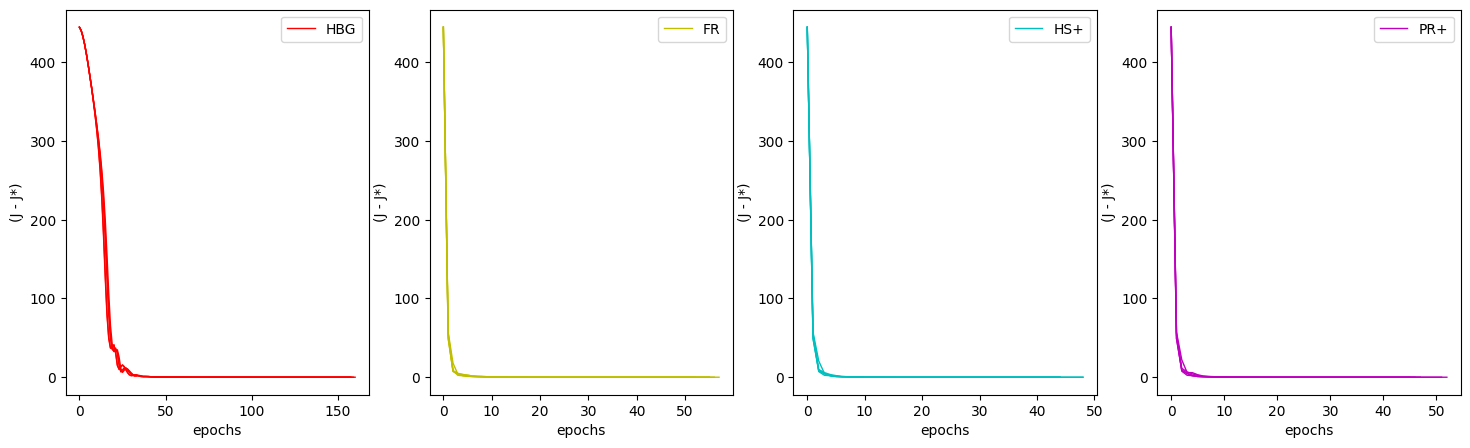

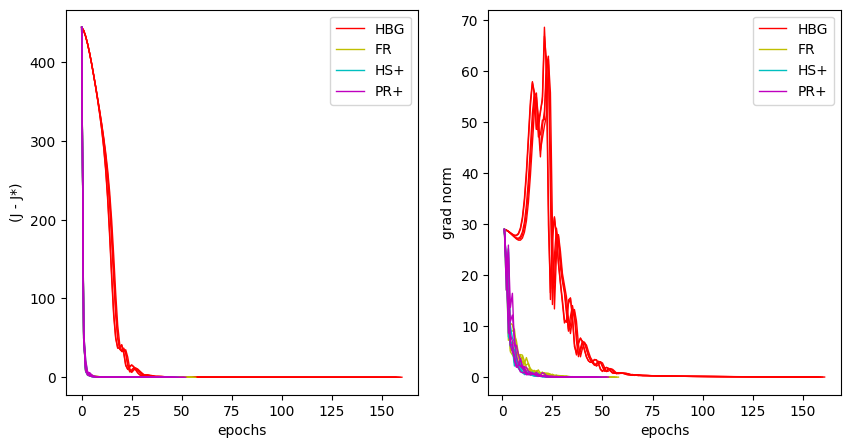

In [14]:
mlp_linear = MLP([20], 9, 2, task = "regression", activation_function = 'id')

J_star = 3.005

fig, ax = plt.subplots(1,4, figsize = (18,5))
fig2, ax2 = plt.subplots(1,2, figsize = (10,5))
linewidth = 1

optimizer = HBG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping = EarlyStopping(mode = 'obj_tol'))

feval = []
epochs = []
elapsed_time = []
J_min = []

print('HBG:')

for i in range(5):

    mlp_linear.initialize(random_seed=i)
    optimizer.initialize(mlp_linear, alpha = 0.005, beta = 0.8, stopping_value = 1e-4, alpha_l2 = 0.001, verbose = False)

    tic = time.time()

    optimizer.fit_model(X_train, y_train)
    
    toc = time.time()
    elapsed_time.append(toc-tic)

    curve = [J - J_star for J in optimizer.obj_history]
    line, = ax[0].plot(curve, 'r', linewidth=linewidth)
    line2, = ax2[0].plot(curve, 'r', linewidth=linewidth)
    line3, = ax2[1].plot(optimizer.grad_norm_history, 'r', linewidth=linewidth)
        

    if i == 0:
        line.set_label('HBG')
        line2.set_label('HBG')
        line3.set_label('HBG')
    
    J_min.append(np.min(optimizer.obj_history))
    feval.append(optimizer.n_forward_backward)
    epochs.append(len(optimizer.obj_history))

print(f"J_min: {J_min}")
print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
print(f"mean number of epochs for convergence: {np.mean(epochs)}")
print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")


optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping = EarlyStopping(mode = 'obj_tol'))
beta_color = {'FR' : 'y', 'HS+' : 'c', 'PR+' : 'm'}

for b, beta in enumerate(['FR', 'HS+', 'PR+']):
    feval = []
    epochs = []
    elapsed_time = []
    J_min = []
    
    print('\n')
    print(f'CG ({beta}):')
    for i in range(5):

        mlp_linear.initialize(random_seed=i)
        optimizer.initialize(mlp_linear, stopping_value = 1e-3, batch_size = -1, alpha_l1 = 0, alpha_l2 = 0.001, verbose = False,
                   beta_type = beta, m1 = 0.1, m2 = 0.3, MaxFeval = 100, tau = 0.8, delta = 0, eps = 0, sfgrd = 0.2)
        
        tic = time.time()

        optimizer.fit_model(X_train, y_train)

        toc = time.time()
        elapsed_time.append(toc-tic)

        curve = [J - J_star for J in optimizer.obj_history]
        line, = ax[b+1].plot(curve, beta_color[beta], linewidth=linewidth)
        line2, = ax2[0].plot(curve, beta_color[beta], linewidth=linewidth)
        line3, = ax2[1].plot(optimizer.grad_norm_history, beta_color[beta], linewidth=linewidth)
        
        if i == 0:
            line.set_label(beta)
            line2.set_label(beta)
            line3.set_label(beta)
    
        J_min.append(np.min(optimizer.obj_history))
        feval.append(optimizer.n_forward_backward)
        epochs.append(len(optimizer.obj_history))

    print(f"J_min: {J_min}")
    print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
    print(f"mean number of epochs for convergence: {np.mean(epochs)}")
    print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
    print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")

for j in range(4):
    ax[j].legend()
    ax[j].set_xlabel("epochs")
    ax[j].set_ylabel("(J - J*)")
    
ax2[0].legend()
ax2[0].set_xlabel("epochs")
ax2[0].set_ylabel("(J - J*)")
ax2[1].legend()
ax2[1].set_xlabel("epochs")
ax2[1].set_ylabel("grad norm")

### Experiment 2. Non-convex optimization. (Non linear NN). 

Anche qui ci sarebbero prima le grid search da fare

#### Shallow NN [9,20]

HBG:
J_min: [1.9759426514554363, 1.9685675617011462, 1.9842444851082264, 1.9868292951112234, 2.0013855817827135]
mean: 1.983393915031749; std: 0.011059543030259168
mean number of epochs for convergence: 1824.8
mean number of function evaluations for convergence: 1824.8
mean elapsed time for convergence: 5.043163061141968


CG (FR):
J_min: [1.7848180698507345, 1.782696159858575, 1.7948184559495575, 1.7856490099925273, 1.7552362315525833]
mean: 1.7806435854407954; std: 0.013365285199451942
mean number of epochs for convergence: 512.2
mean number of function evaluations for convergence: 2418.6
mean elapsed time for convergence: 6.646948432922363


CG (HS+):
J_min: [1.7264736823444276, 1.7514958289381113, 1.7328057297571537, 1.7502109255491711, 1.7200101089531967]
mean: 1.7361992551084122; std: 0.012637272748500718
mean number of epochs for convergence: 371.8
mean number of function evaluations for convergence: 3641.2
mean elapsed time for convergence: 7.363612651824951


CG (PR+):
J_min: 

Text(0, 0.5, 'grad norm')

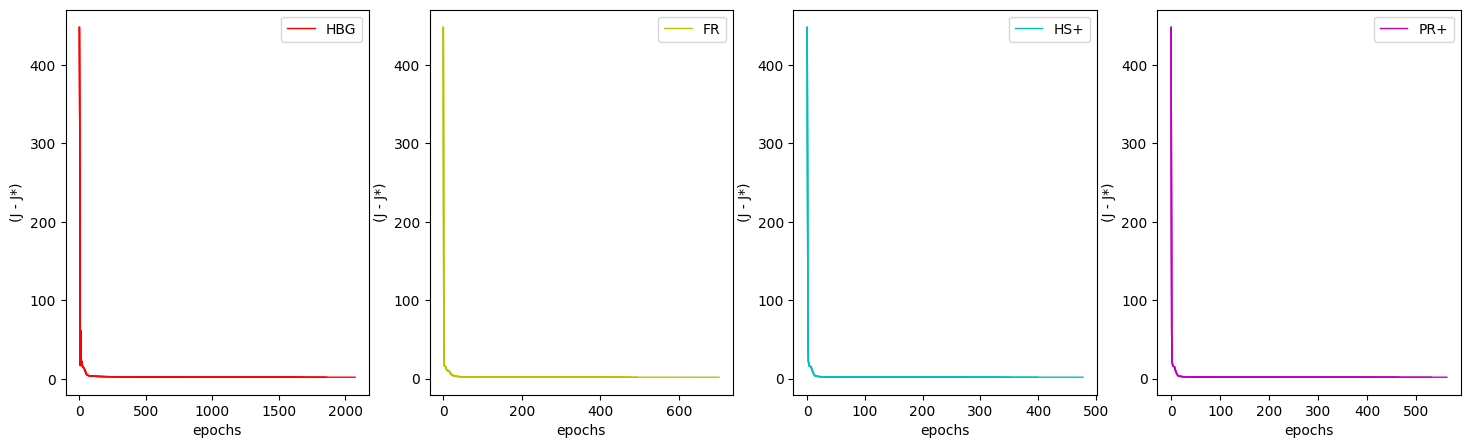

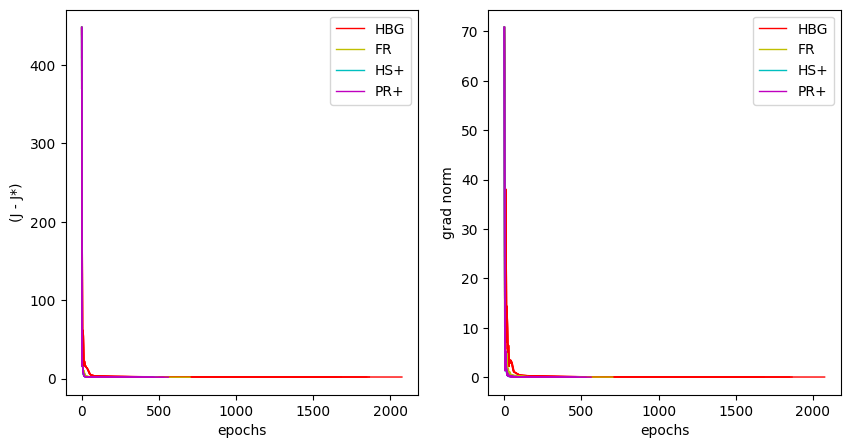

In [17]:
mlp= MLP([20], 9, 2, task = "regression", activation_function = 'sigm')

J_star = 0 #fill with grid search results

fig, ax = plt.subplots(1,4, figsize = (18,5))
fig2, ax2 = plt.subplots(1,2, figsize = (10,5))
linewidth = 1

optimizer = HBG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping = EarlyStopping(mode = 'obj_tol'))

feval = []
epochs = []
elapsed_time = []
J_min = []

print('HBG:')

for i in range(5):

    mlp.initialize(random_seed=i)
    optimizer.initialize(mlp, alpha = 0.01, beta = 0.8, stopping_value = 1e-4, alpha_l2 = 0.001, verbose = False)

    tic = time.time()

    optimizer.fit_model(X_train, y_train)
    
    toc = time.time()
    elapsed_time.append(toc-tic)

    curve = [J - J_star for J in optimizer.obj_history]
    line, = ax[0].plot(curve, 'r', linewidth=linewidth)
    line2, = ax2[0].plot(curve, 'r', linewidth=linewidth)
    line3, = ax2[1].plot(optimizer.grad_norm_history, 'r', linewidth=linewidth)
        

    if i == 0:
        line.set_label('HBG')
        line2.set_label('HBG')
        line3.set_label('HBG')
    
    J_min.append(np.min(optimizer.obj_history))
    feval.append(optimizer.n_forward_backward)
    epochs.append(len(optimizer.obj_history))

print(f"J_min: {J_min}")
print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
print(f"mean number of epochs for convergence: {np.mean(epochs)}")
print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")


optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping = EarlyStopping(mode = 'obj_tol'))
beta_color = {'FR' : 'y', 'HS+' : 'c', 'PR+' : 'm'}

for b, beta in enumerate(['FR', 'HS+', 'PR+']):
    feval = []
    epochs = []
    elapsed_time = []
    J_min = []
    
    print('\n')
    print(f'CG ({beta}):')
    for i in range(5):

        mlp.initialize(random_seed=i)
        optimizer.initialize(mlp, stopping_value = 1e-3, batch_size = -1, alpha_l1 = 0, alpha_l2 = 0.001, verbose = False,
                   beta_type = beta, m1 = 0.1, m2 = 0.3, MaxFeval = 100, tau = 0.8, delta = 0, eps = 0, sfgrd = 0.2)
        
        tic = time.time()

        optimizer.fit_model(X_train, y_train)

        toc = time.time()
        elapsed_time.append(toc-tic)

        curve = [J - J_star for J in optimizer.obj_history]
        line, = ax[b+1].plot(curve, beta_color[beta], linewidth=linewidth)
        line2, = ax2[0].plot(curve, beta_color[beta], linewidth=linewidth)
        line3, = ax2[1].plot(optimizer.grad_norm_history, beta_color[beta], linewidth=linewidth)
        
        if i == 0:
            line.set_label(beta)
            line2.set_label(beta)
            line3.set_label(beta)
    
        J_min.append(np.min(optimizer.obj_history))
        feval.append(optimizer.n_forward_backward)
        epochs.append(len(optimizer.obj_history))

    print(f"J_min: {J_min}")
    print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
    print(f"mean number of epochs for convergence: {np.mean(epochs)}")
    print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
    print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")

for j in range(4):
    ax[j].legend()
    ax[j].set_xlabel("epochs")
    ax[j].set_ylabel("(J - J*)")
    
ax2[0].legend()
ax2[0].set_xlabel("epochs")
ax2[0].set_ylabel("(J - J*)")
ax2[1].legend()
ax2[1].set_xlabel("epochs")
ax2[1].set_ylabel("grad norm")

#### Deep NN [9, 40, 20]

HBG:
J_min: [2.0628388265958404, 2.070115555745091, 2.0744097654150533, 2.1111911438520696, 2.112915221331208]
mean: 2.0862941025878525; std: 0.021362019786067183
mean number of epochs for convergence: 1334.8
mean number of function evaluations for convergence: 1334.8
mean elapsed time for convergence: 10.863553524017334


CG (FR):
J_min: [1.7635943537729164, 1.7420543548112895, 1.7934030478172862, 1.7297241231176694, 1.748407089896449]
mean: 1.7554365938831222; std: 0.021898082438849012
mean number of epochs for convergence: 1161.0
mean number of function evaluations for convergence: 5211.2
mean elapsed time for convergence: 35.01408548355103


CG (HS+):
J_min: [1.7146527717780315, 1.7192486129645743, 1.7525358775522675, 1.7472351285830152, 1.7240367675458246]
mean: 1.7315418316847428; std: 0.01536046280675628
mean number of epochs for convergence: 637.8
mean number of function evaluations for convergence: 3290.6
mean elapsed time for convergence: 34.73408126831055


CG (PR+):
J_min: 

Text(0, 0.5, 'grad norm')

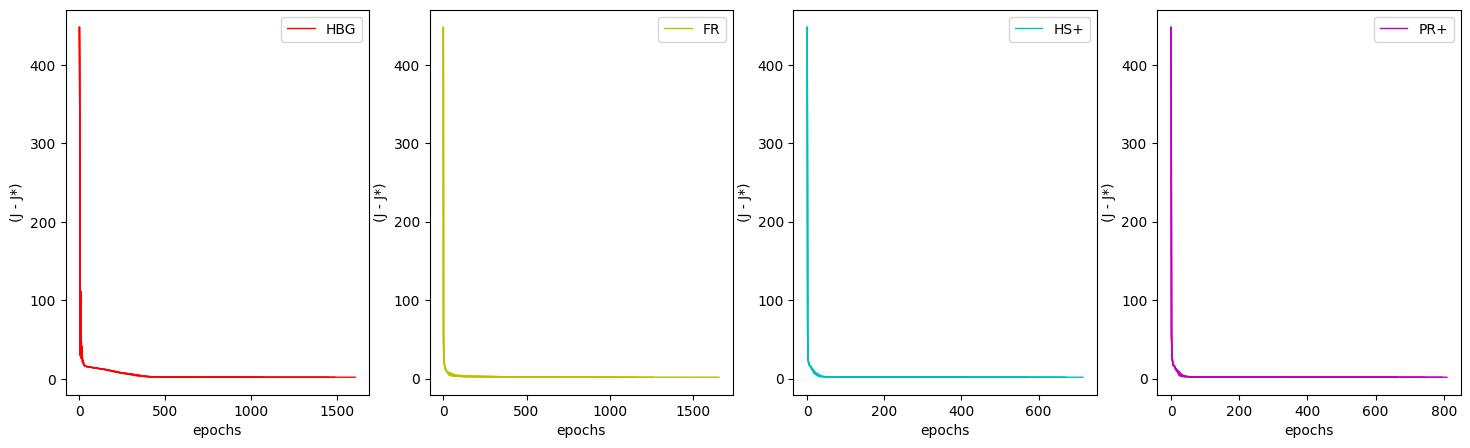

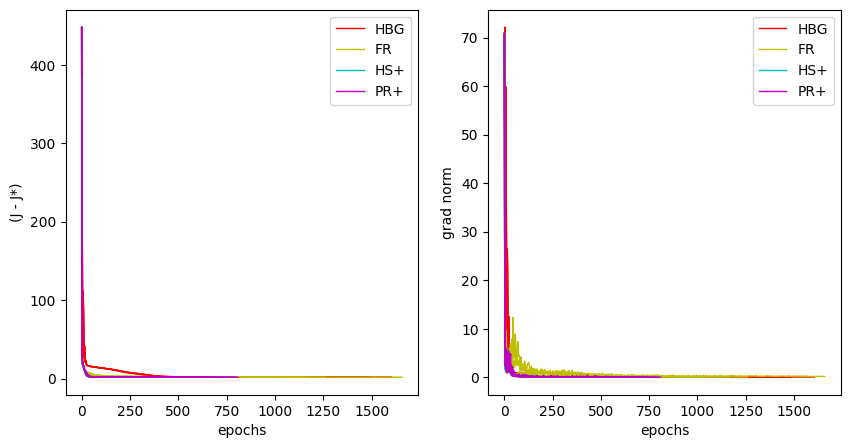

In [19]:
mlp= MLP([40, 20], 9, 2, task = "regression", activation_function = 'sigm')

J_star = 0 #fill with grid search results

fig, ax = plt.subplots(1,4, figsize = (18,5))
fig2, ax2 = plt.subplots(1,2, figsize = (10,5))
linewidth = 1

optimizer = HBG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping = EarlyStopping(mode = 'obj_tol'))

feval = []
epochs = []
elapsed_time = []
J_min = []

print('HBG:')

for i in range(5):

    mlp.initialize(random_seed=i)
    optimizer.initialize(mlp, alpha = 0.01, beta = 0.8, stopping_value = 1e-4, alpha_l2 = 0.001, verbose = False)

    tic = time.time()

    optimizer.fit_model(X_train, y_train)
    
    toc = time.time()
    elapsed_time.append(toc-tic)

    curve = [J - J_star for J in optimizer.obj_history]
    line, = ax[0].plot(curve, 'r', linewidth=linewidth)
    line2, = ax2[0].plot(curve, 'r', linewidth=linewidth)
    line3, = ax2[1].plot(optimizer.grad_norm_history, 'r', linewidth=linewidth)
        

    if i == 0:
        line.set_label('HBG')
        line2.set_label('HBG')
        line3.set_label('HBG')
    
    J_min.append(np.min(optimizer.obj_history))
    feval.append(optimizer.n_forward_backward)
    epochs.append(len(optimizer.obj_history))

print(f"J_min: {J_min}")
print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
print(f"mean number of epochs for convergence: {np.mean(epochs)}")
print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")


optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping = EarlyStopping(mode = 'obj_tol'))
beta_color = {'FR' : 'y', 'HS+' : 'c', 'PR+' : 'm'}

for b, beta in enumerate(['FR', 'HS+', 'PR+']):
    feval = []
    epochs = []
    elapsed_time = []
    J_min = []
    
    print('\n')
    print(f'CG ({beta}):')
    for i in range(5):

        mlp.initialize(random_seed=i)
        optimizer.initialize(mlp, stopping_value = 1e-3, batch_size = -1, alpha_l1 = 0, alpha_l2 = 0.001, verbose = False,
                   beta_type = beta, m1 = 0.1, m2 = 0.3, MaxFeval = 100, tau = 0.8, delta = 0, eps = 0, sfgrd = 0.2)
        
        tic = time.time()

        optimizer.fit_model(X_train, y_train)

        toc = time.time()
        elapsed_time.append(toc-tic)

        curve = [J - J_star for J in optimizer.obj_history]
        line, = ax[b+1].plot(curve, beta_color[beta], linewidth=linewidth)
        line2, = ax2[0].plot(curve, beta_color[beta], linewidth=linewidth)
        line3, = ax2[1].plot(optimizer.grad_norm_history, beta_color[beta], linewidth=linewidth)
        
        if i == 0:
            line.set_label(beta)
            line2.set_label(beta)
            line3.set_label(beta)
    
        J_min.append(np.min(optimizer.obj_history))
        feval.append(optimizer.n_forward_backward)
        epochs.append(len(optimizer.obj_history))

    print(f"J_min: {J_min}")
    print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
    print(f"mean number of epochs for convergence: {np.mean(epochs)}")
    print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
    print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")

for j in range(4):
    ax[j].legend()
    ax[j].set_xlabel("epochs")
    ax[j].set_ylabel("(J - J*)")
    
ax2[0].legend()
ax2[0].set_xlabel("epochs")
ax2[0].set_ylabel("(J - J*)")
ax2[1].legend()
ax2[1].set_xlabel("epochs")
ax2[1].set_ylabel("grad norm")